In [1]:
print("What hath God wrought")
"""
League of Legends Project - Exploratory Analysis
The goal of this project is to show my relevant data science skills using match data from the video game LoL (League of Legends) to predict the result of games.
This first notebook will be focused on data exploration, visualisation and analysis
Through this analysis, I hope to gain a better understanding of my data to guide me in building a more accurate predictive model
I also hope to extract some meaningful insights from the data that can be used in real life situations to guide decision making processes
Part 1 of this notebook will be data collection and preprocessing
Part 2 will be focused on exploratory analysis and data visualisation
"""

What hath God wrought


'\nLeague of Legends Project - Exploratory Analysis\nThe goal of this project is to show my relevant data science skills using match data from the video game LoL (League of Legends) to predict the result of games.\nThis first notebook will be focused on data exploration, visualisation and analysis\nThrough this analysis, I hope to gain a better understanding of my data to guide me in building a more accurate predictive model\nI also hope to extract some meaningful insights from the data that can be used in real life situations to guide decision making processes\nPart 1 of this notebook will be data collection and preprocessing\nPart 2 will be focused on exploratory analysis and data visualisation\n'

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import percentileofscore
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
 # Ideal dtypes for each category that isn't "float64"
"""df24 = pd.read_csv("data/2024_LoL_esports_match_data_from_OraclesElixir.csv",
                 dtype={"gameid":"category", "datacompleteness":"category", "url":"category", "league":"category", "year":"uint16", "split":"category", "playoffs":"uint8", "game":"uint8", "patch":"category", "participantid":"uint8", "side":"category", "position":"category", "playername":"category", "playerid":"category", "teamname":"category", "teamid": "category", "champion": "category", "ban1":"category", "ban2":"category", "ban3":"category", "ban4":"category", "ban5":"category", "pick1":"category", "pick2":"category", "pick3":"category", "pick4":"category", "pick5":"category", "gamelength":"uint16", "result":"uint8", "kills":"uint8", "deaths":"uint8", "assists":"uint8", "teamkills":"uint8", "teamdeaths":"uint8", "damagetochampions":"uint32", "wardsplaced":"uint16", "wardskilled":"uint8", "controlwardsbought":"uint8", "visionscore":"uint16", "totalgold":"uint32", "earnedgold":"uint32", "goldspend":"uint32", "monsterkills":"uint16"},
                  parse_dates=["date"])"""
# 272597490 to 129192768 through dtypes alone in terms of memory usage of the above statement

'df24 = pd.read_csv("data/2024_LoL_esports_match_data_from_OraclesElixir.csv",\n                 dtype={"gameid":"category", "datacompleteness":"category", "url":"category", "league":"category", "year":"uint16", "split":"category", "playoffs":"uint8", "game":"uint8", "patch":"category", "participantid":"uint8", "side":"category", "position":"category", "playername":"category", "playerid":"category", "teamname":"category", "teamid": "category", "champion": "category", "ban1":"category", "ban2":"category", "ban3":"category", "ban4":"category", "ban5":"category", "pick1":"category", "pick2":"category", "pick3":"category", "pick4":"category", "pick5":"category", "gamelength":"uint16", "result":"uint8", "kills":"uint8", "deaths":"uint8", "assists":"uint8", "teamkills":"uint8", "teamdeaths":"uint8", "damagetochampions":"uint32", "wardsplaced":"uint16", "wardskilled":"uint8", "controlwardsbought":"uint8", "visionscore":"uint16", "totalgold":"uint32", "earnedgold":"uint32", "goldspend":"uint32

In [5]:
# Importing all the files with the correct dtypes for data that doesn't include NaN values (data that does is kept as float64 or string objects
df24 = pd.read_csv("data/2024_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [6]:
df23 = pd.read_csv("data/2023_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [7]:
df22 = pd.read_csv("data/2022_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [8]:
df21 = pd.read_csv("data/2021_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [9]:
df20 = pd.read_csv("data/2020_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [10]:
df19 = pd.read_csv("data/2019_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [11]:
df18 = pd.read_csv("data/2018_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [12]:
df17 = pd.read_csv("data/2017_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [13]:
df16 = pd.read_csv("data/2016_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [14]:
df15 = pd.read_csv("data/2015_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [15]:
df14 = pd.read_csv("data/2014_LoL_esports_match_data_from_OraclesElixir.csv",
                   dtype={"gameid": "category", "datacompleteness": "category", "url": "category", "league": "category",
                          "year": "uint16", "split": "category", "playoffs": "uint8", "patch": "category",
                          "participantid": "uint8", "side": "category", "position": "category",
                          "playername": "category", "playerid": "category", "teamname": "category",
                          "teamid": "category", "champion": "category", "ban1": "category", "ban2": "category",
                          "ban3": "category", "ban4": "category", "ban5": "category", "pick1": "category",
                          "pick2": "category", "pick3": "category", "pick4": "category", "pick5": "category",
                          "gamelength": "uint16", "result": "uint8", "kills": "uint8", "deaths": "uint8",
                          "assists": "uint8", "teamkills": "uint8", "teamdeaths": "uint8"},
                   parse_dates=["date"])

In [16]:
# Joining together all the dataframes
dflol = pd.concat([df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24], axis=0)

In [17]:
dflol.dtypes

gameid               object
datacompleteness     object
url                  object
league               object
year                 uint16
                     ...   
assistsat25         float64
deathsat25          float64
opp_killsat25       float64
opp_assistsat25     float64
opp_deathsat25      float64
Length: 161, dtype: object

In [18]:
# Checking that the new combined dataframe dflol has the same number of rows of the previous dataframes
shape_arr = np.array([df14.shape[0], df15.shape[0], df16.shape[0], df17.shape[0], df18.shape[0], df19.shape[0], df20.shape[0], df21.shape[0], df22.shape[0], df23.shape[0], df24.shape[0]])
print(np.sum(shape_arr), dflol.shape[0])

995484 995484


In [19]:
dflol.head(13)
# Each game takes up 12 rows.  10 for the players and 2 for the teams
# Some stats, like "dragons" (the total number of dragons killed by the team, are only filled in for the team columns whilst some, like "champion" (the character that each player chooses) are only filled in for the player column
# We can see the difference by using the "participantid" column.  The players are numbered from 1 to 10, the players 1-5 on the blue side team and the players 6-10 on the red side team.  The 2 teams have participant ids of 100 for the blue side team and 200 for the red side team.

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,206.0,76.0,-512.0,-18.0,3.0,4.0,0.0,1.0,2.0,2.0
1,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,140.0,-888.0,351.0,-42.0,0.0,5.0,3.0,2.0,1.0,1.0
2,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,225.0,621.0,733.0,8.0,1.0,5.0,1.0,1.0,2.0,0.0
3,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,161.0,3265.0,1950.0,50.0,6.0,2.0,0.0,0.0,0.0,4.0
4,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,28.0,1780.0,2397.0,-19.0,0.0,7.0,0.0,0.0,1.0,3.0
5,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,188.0,-76.0,512.0,18.0,1.0,2.0,2.0,3.0,4.0,0.0
6,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,98.0,888.0,-351.0,42.0,2.0,1.0,1.0,0.0,5.0,3.0
7,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,233.0,-621.0,-733.0,-8.0,1.0,2.0,0.0,1.0,5.0,1.0
8,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,211.0,-3265.0,-1950.0,-50.0,0.0,0.0,4.0,6.0,2.0,0.0
9,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,9.0,-1780.0,-2397.0,19.0,0.0,1.0,3.0,0.0,7.0,0.0


In [20]:
# We can see in 3 of the columns that there is missing data that is not being categorised as NaN but as 0.0 instead.  These are columns that should never be 0 for an entire team.  Every time a champion is attacked, they mitigate some damage, and so "damagemitigatedperminute" should never be 0
# Vision score and vspm (vision score per minute) should never be 0 and are increased when players place and destroy wards (trinkets that give vision over a particular area of the map).  We can see based off of the wardsplaced and wardskilled that players should have a vision score but yet it is marked as 0.
print(dflol.loc[dflol["vspm"] == 0.0, "wardsplaced"].shape[0])
print(dflol.loc[(dflol["vspm"] == 0.0)  & (dflol["wardsplaced"] == 0.0), "wardsplaced"].shape[0])
# We can see that out of 100,118 instances only 34 could be actual cases and none in the past decade.  I will convert all the 0.0 values to NaN values.

100118
34


In [21]:
dflol.loc[:, ["damagemitigatedperminute", "visionscore", "vspm"]] = dflol.loc[:, ["damagemitigatedperminute", "visionscore", "vspm"]].replace(0.0, np.nan)

In [22]:
dflol.loc[(dflol["vspm"] == 0.0)  & (dflol["wardsplaced"] == 0.0)]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25


In [24]:
#dflol.to_pickle("dflol.pkl")

In [11]:
dflol = pd.read_pickle("dflol.pkl")

In [12]:
dflol = dflol.set_index("gameid")

In [13]:
dflol["participantid"].value_counts()
# Each position is represented an equal amount of times.

participantid
1      82957
2      82957
3      82957
4      82957
5      82957
6      82957
7      82957
8      82957
9      82957
10     82957
100    82957
200    82957
Name: count, dtype: int64

In [14]:
dflol.head(13)

,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
gameid,,,,,,,,,,,,,,,,,,,,,
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,1,...,206.0,76.0,-512.0,-18.0,3.0,4.0,0.0,1.0,2.0,2.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,2,...,140.0,-888.0,351.0,-42.0,0.0,5.0,3.0,2.0,1.0,1.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,3,...,225.0,621.0,733.0,8.0,1.0,5.0,1.0,1.0,2.0,0.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,4,...,161.0,3265.0,1950.0,50.0,6.0,2.0,0.0,0.0,0.0,4.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,5,...,28.0,1780.0,2397.0,-19.0,0.0,7.0,0.0,0.0,1.0,3.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,6,...,188.0,-76.0,512.0,18.0,1.0,2.0,2.0,3.0,4.0,0.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,7,...,98.0,888.0,-351.0,42.0,2.0,1.0,1.0,0.0,5.0,3.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,8,...,233.0,-621.0,-733.0,-8.0,1.0,2.0,0.0,1.0,5.0,1.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,9,...,211.0,-3265.0,-1950.0,-50.0,0.0,0.0,4.0,6.0,2.0,0.0


In [15]:
# If we look at the "datacompleteness" column, those rows which are labeled as "error" have a variety of missing statistics that they should have but the games with this are from lower quality leauges.  This pattern shows up throughout this dataset, that missing data is generally from lower-quality leagues or older games rather than newer games that are higher quality.  Because I plan to use the dataset to predict games in the future, missing data that is 8 or 9 years old isn't a big problem and missing data that is from lower quality games isn't a major problem either.
dflol[dflol["datacompleteness"] == "error"]

,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
gameid,,,,,,,,,,,,,,,,,,,,,
EUW1_5339462442,error,https://matchhistory.euw.leagueoflegends.com/e...,OTBLX,2021,NaN,0,2021-06-26 13:58:39,1.0,11.13,1,...,131.0,3288.0,1656.0,50.0,4.0,2.0,1.0,1.0,1.0,2.0
EUW1_5339462442,error,https://matchhistory.euw.leagueoflegends.com/e...,OTBLX,2021,NaN,0,2021-06-26 13:58:39,1.0,11.13,2,...,151.0,904.0,-41.0,-19.0,3.0,4.0,2.0,1.0,6.0,1.0
EUW1_5339462442,error,https://matchhistory.euw.leagueoflegends.com/e...,OTBLX,2021,NaN,0,2021-06-26 13:58:39,1.0,11.13,3,...,244.0,-643.0,-1106.0,-52.0,2.0,6.0,3.0,2.0,4.0,3.0
EUW1_5339462442,error,https://matchhistory.euw.leagueoflegends.com/e...,OTBLX,2021,NaN,0,2021-06-26 13:58:39,1.0,11.13,4,...,220.0,-788.0,303.0,0.0,2.0,4.0,1.0,5.0,0.0,2.0
EUW1_5339462442,error,https://matchhistory.euw.leagueoflegends.com/e...,OTBLX,2021,NaN,0,2021-06-26 13:58:39,1.0,11.13,5,...,32.0,1083.0,2214.0,5.0,1.0,8.0,2.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA1_3969620093,error,https://matchhistory.na.leagueoflegends.com/en...,EGL,2021,NaN,0,2021-07-08 01:51:57,1.0,11.13,8,...,162.0,221.0,749.0,48.0,0.0,1.0,1.0,0.0,8.0,1.0
NA1_3969620093,error,https://matchhistory.na.leagueoflegends.com/en...,EGL,2021,NaN,0,2021-07-08 01:51:57,1.0,11.13,9,...,34.0,263.0,1324.0,129.0,2.0,2.0,3.0,1.0,9.0,1.0
NA1_3969620093,error,https://matchhistory.na.leagueoflegends.com/en...,EGL,2021,NaN,0,2021-07-08 01:51:57,1.0,11.13,10,...,236.0,-4446.0,-5293.0,-217.0,2.0,1.0,3.0,0.0,2.0,2.0


In [25]:
games_per_year = (dflol["year"].value_counts()/12).reset_index().sort_values(by="year")

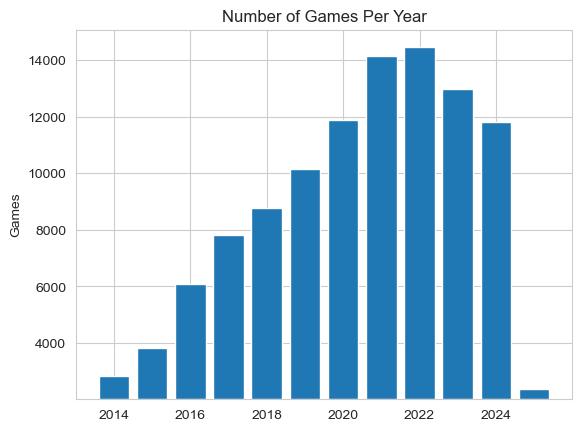

In [27]:
# Bar chart showing the distribution of games by year.  Over 10,000 games from 2019 to 2024.  Less than 4,000 games in 2014 and 2015.  The number of matches captured by the data has increased significantly.
years = np.array(range(2014,2026))
plt.bar(years, games_per_year["count"], bottom=years)
plt.title("Number of Games Per Year")
plt.ylabel("Games")
plt.show()

In [28]:
# This is primarily due to more games being recorded.  For 2014 only 4 leagues are part of the data (along with the World Championship "WLDs") and those leagues are in Europe and North America.
df14["league"].value_counts()/12

NameError: name 'df14' is not defined

In [32]:
# However, 51 leagues are recorded in 2024.  Many of these leagues did not exist in 2014, like the LFL French National League but many, like the Chinese LPL did but were just not recorded in the 2014 data.
df24["league"].value_counts()/12

league
LPL                717.0
LDL                565.0
LCKC               511.0
NACL               488.0
LCK                482.0
EM                 399.0
PCS                296.0
LEC                294.0
ESLOL              291.0
LAS                289.0
CBLOLA             276.0
CBLOL              263.0
VCS                252.0
LVP SL             242.0
PRM                241.0
LFL                237.0
LLA                213.0
NLC                207.0
LCS                192.0
TCL                181.0
LFL2               172.0
NEXO               161.0
UL                 158.0
LCO                156.0
HM                 155.0
LPLOL              154.0
GLL                153.0
AL                 153.0
EPL                150.0
LIT                149.0
LJL                148.0
EBL                142.0
PRMP               134.0
WLDs               132.0
HC                 111.0
TSC                104.0
LRS                102.0
LRN                 90.0
HW                  84.0
MSI               

In [33]:
# If we look at the data from 2015, we can see that the "league" column includes some wrong data.  It includes the "LEC" league, which at this time, didn't exist.
df15["league"].value_counts()/12

league
OGN       394.0
NA LCS    247.0
EU LCS    247.0
LMS       183.0
TCL       168.0
NA CS     135.0
EU CS     133.0
WLDs       73.0
OPL        52.0
IEM        47.0
KeSPA      34.0
CBLOL      30.0
MSI        28.0
LCS        14.0
TPL        12.0
LEC        11.0
LCK         8.0
Name: count, dtype: float64

In [34]:
# We can have a closer look at the games, and they are part of the "EU LCS regional qualifier" tournament.  This has been wrongly labelled as part of the LEC.
# The problem of classifying what tournaments are part of what league, is the regional qualifier part of the normal EU LCS league despite it only involving 4 teams?  I won't manually verify and change the entire "league" column and so it will remain an unreliable column.
df15[df15["league"] == "LEC"]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
18972,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,158.0,658.0,870.0,31.0,2.0,0.0,1.0,0.0,3.0,2.0
18973,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,80.0,-829.0,22.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0
18974,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,269.0,-1243.0,-1310.0,-26.0,0.0,0.0,1.0,2.0,0.0,0.0
18975,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,219.0,-920.0,-94.0,-17.0,0.0,1.0,1.0,2.0,0.0,0.0
18976,TRLH3/1001300011,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-29 14:54:15,1,5.14,...,30.0,-1091.0,-165.0,-8.0,0.0,1.0,2.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,237.0,-477.0,-218.0,-14.0,0.0,3.0,2.0,2.0,4.0,0.0
19220,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,215.0,-66.0,-464.0,32.0,1.0,1.0,1.0,0.0,2.0,0.0
19221,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,20.0,878.0,-292.0,-7.0,1.0,3.0,1.0,0.0,3.0,4.0
19222,TRLH3/1001310030,complete,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2015,NaN,0,2015-08-31 16:53:20,3,5.14,...,757.0,-893.0,214.0,-66.0,7.0,14.0,7.0,7.0,9.0,7.0


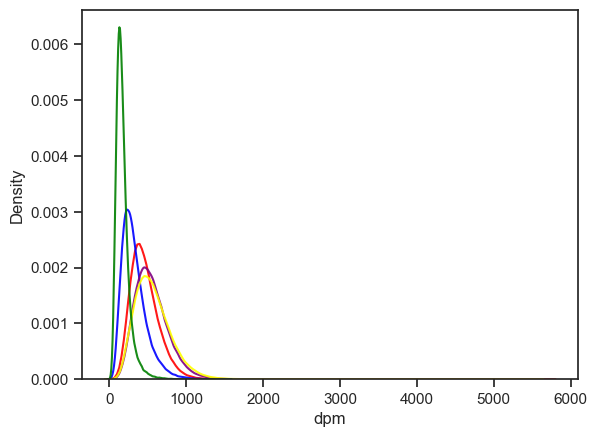

In [29]:
# To evaluate variations between the different positions we can look at "dpm" (damage per minute)
colours = ["red", "blue", "purple", "yellow", "green"]
positions = ["top", "jng", "mid", "bot", "sup"]
sns.set_theme(style="ticks", palette="pastel")
for i in range(5):
    sns.kdeplot(dflol.loc[dflol["position"] == positions[i], "dpm"], color=colours[i], linewidth=1.5, alpha=0.9)
plt.show()

In [30]:
# We can see that Support has the lowest damage follows by Jungle and then Top.  Mid and Bot have nearly identical modes but bot has a higher mean.
# In terms of damage, the positions Mid and Bot are the most important with Support doing the least damage.

In [31]:
dflol["vspm"].value_counts()

vspm
1.0909    401
1.1321    367
1.0000    359
1.2000    356
0.9836    355
         ... 
0.1751      1
5.2287      1
4.8706      1
9.1062      1
9.3087      1
Name: count, Length: 82364, dtype: int64

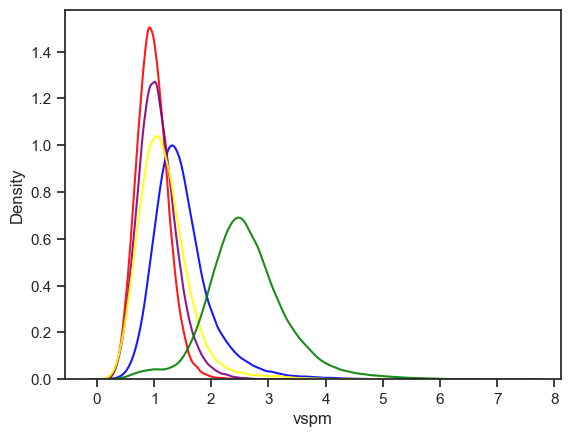

In [32]:
colours = ["red", "blue", "purple", "yellow", "green"]
positions = ["top", "jng", "mid", "bot", "sup"]
sns.set_theme(style="ticks", palette="pastel")
for i in range(5):
    sns.kdeplot(dflol.loc[dflol["position"] == positions[i], "vspm"], color=colours[i], linewidth=1.5, alpha=0.9)
plt.show()
# We can see that Support has by far and away the highest vspm (Vision Score per Minute) followed by Jungle and then Mid, Bot and Top.
# Vision Score is increased when a ward spots an enemy and so Top, which is often isolated in the top of the map has the lowest vspm with Mid, who is generally in the middle of the map, having a higher vspm.

In [33]:
dflol[dflol["position"] == "sup"].groupby("year")["vspm"].mean()
# We can see that the vision score,

year
2014         NaN
2015         NaN
2016         NaN
2017    2.480986
2018    2.306845
2019    2.277233
2020    2.398127
2021    2.489801
2022    2.476395
2023    2.890897
2024    3.272496
2025    3.185257
Name: vspm, dtype: float64

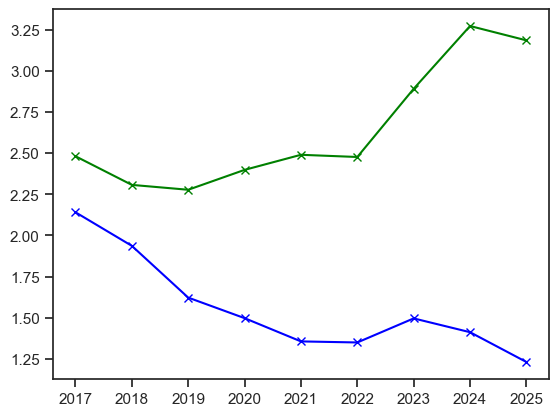

In [34]:
plt.plot(dflol[dflol["position"] == "sup"].groupby("year")["vspm"].mean(), marker="x", linestyle="-", color="green")
plt.plot(dflol[dflol["position"] == "jng"].groupby("year")["vspm"].mean(), marker="x", linestyle="-", color="blue")
plt.show()
# Using statistics like vspm can also be difficult because each position's focus on vision changes each year.  Junglers have become less focused on vision whilst supports have become more focused since 2017.  This is due to the game being changed in significant ways at the end of each year.

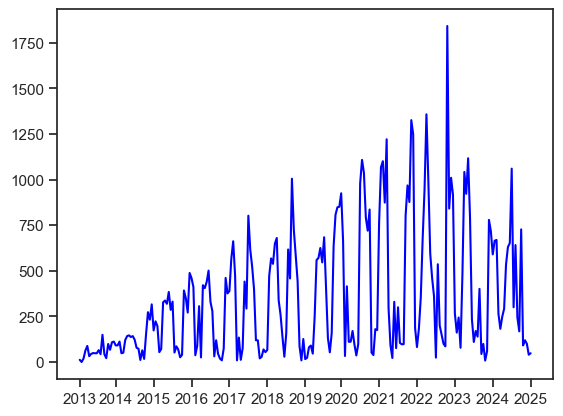

In [35]:
selections = ((((dflol["patch"].value_counts()
 .reset_index()
 .astype({"patch": "float32"}))
 .sort_values(by="patch"))
 .set_index("patch")))/12

patches_arr = dflol["patch"].astype("float32").unique()

plt.plot(patches_arr.astype("str"),selections.reindex(patches_arr, fill_value=0), color="blue")

tick_locations = patches_arr[np.linspace(0, len(patches_arr) - 1, 13, dtype=int)]

plt.xticks(ticks=tick_locations.astype("str"), labels=np.arange(2013,2026).astype("str"))

plt.gca().set_facecolor("white")
plt.show()
# If we look at spread of games over the patches, there are large fluctuations.  These correlate to the "splits" where leagues will run for a couple of months and then take a break.
# There are significant periods where very few matches are being played and there are rarely more than 1,000 games on a single patch.  This is too small a sample size to use the patch that each game is on to adjust the data

In [36]:
# On top of there being a large yearly change there are also smaller changes to the game every 2 weeks called patches.  If we look at the graphs of the number of champion selections per patch we can see the importance of these patches.
def champion_selections(champion):

    selections = (dflol[dflol["champion"] == champion].groupby("patch").size()
                        .reset_index()
                        .astype({"patch": "float32"})
                        .sort_values(by="patch")
                        .set_index("patch"))


    patches_arr = dflol["patch"].astype("float32").unique()

    plt.plot(patches_arr.astype("str"),selections.reindex(patches_arr, fill_value=0), color="purple")

    tick_locations = patches_arr[np.linspace(0, len(patches_arr) - 1, 13, dtype=int)]

    plt.xticks(ticks=tick_locations.astype("str"), labels=np.arange(2013,2026).astype("str"))

    plt.gca().set_facecolor("white")
    plt.show()

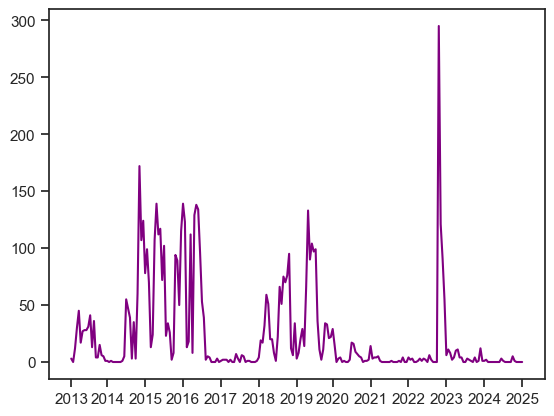

In [37]:
# Elise went through periods of being picked very often, 100+ times a patch followed by periods of obscurity.  We can also see a big spike in 2022 when she was relatively strong and picked often followed by being "nerfed" and becoming weaker.
champion_selections("Elise")

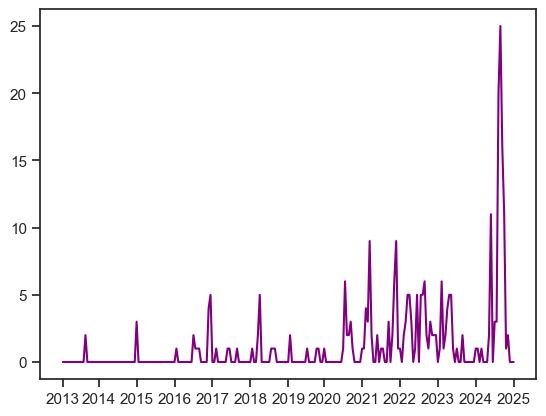

In [38]:
# We can see that Nasus has had just a single period where he was picked more than 10 times.  The reason for the increase is questionable but following it, we can look at the patch notes and see that Nasus was nerfed which caused his pick-rate to fall.
champion_selections("Nasus")

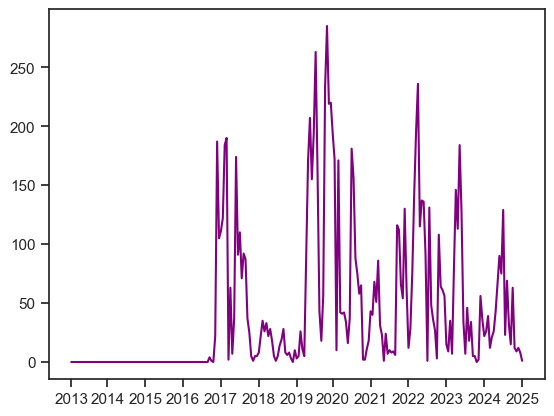

In [39]:
# There are other champions that were only introduced after 2014 like Ornn.  We can see that he wasn't picked at all before 2016 but has been regularly picked ever since.
champion_selections("Ornn")

In [40]:
champs_more_than_200 = dflol["champion"].value_counts()
champs_more_than_200 = champs_more_than_200[champs_more_than_200 > 200].index
win_rate_champs = dflol.loc[dflol["champion"].isin(champs_more_than_200), ["champion", "result"]].groupby("champion")["result"].mean().sort_values()
pd.concat([win_rate_champs.head(10), win_rate_champs.tail(10)])
# Champions have a small effect on win-rate, some more than others.  The difference in standard deviation is

champion
Xerath          0.410120
Nasus           0.439716
Kayn            0.450166
Karma           0.452955
Lulu            0.454114
Bel'Veth        0.454545
Anivia          0.455056
Dr. Mundo       0.457364
Veigar          0.461004
Kog'Maw         0.461071
Camille         0.531995
Talon           0.532020
Aurelion Sol    0.535925
Maokai          0.536810
Rakan           0.541211
Zed             0.544455
Bard            0.551584
Skarner         0.553917
Malzahar        0.554511
Twisted Fate    0.563041
Name: result, dtype: float64

In [41]:
win_rate_champs.std()
# Low standard deviation, 0.022, so not a huge correlation to winning apart from a few select champions.

0.02234940109277609

In [42]:
# Blue side and Red side
# In LoL there is Blue side and Red side, 2 different sides of the map that are theoretically equal, but we can see that the team on Blue side has a slight advantage over the team on Red side.
# Along with the champions selected, the side a team is on is one of the few indicators before a game takes place of what the result is going to be
dflol.groupby("side")["result"].mean()

side
Blue    0.532107
Red     0.467399
Name: result, dtype: float64

In [107]:
# We can also look at which teams play
dflol["teamname"].value_counts()

teamname
unknown team           11742
KT Rolster              6480
Royal Never Give Up     6288
EDward Gaming           6102
Kwangdong Freecs        5436
                       ...  
Wulf Pack Cascade          6
Master Girl                6
Team Zan                   6
Cold Hearted               6
y so E-Sports              6
Name: count, Length: 1833, dtype: int64

In [44]:
teams_more_than_200 = dflol["teamid"].value_counts()
teams_more_than_200 = teams_more_than_200[teams_more_than_200 > 200].index
win_rate_teams = dflol.loc[dflol["teamid"].isin(teams_more_than_200), ["teamid", "teamname", "result"]].groupby(["teamname", "teamid"])["result"].mean().sort_values()
pd.concat([win_rate_teams.head(10), win_rate_teams.tail(10)])

teamname                teamid                                 
SEM9                    oe:team:5e3055ed3b815352627fec92727dfe6    0.055556
Dewish Team             oe:team:f7c0f545d3fc1860239d04b3ebe97f8    0.100000
Qing Jiu E-sport Club   oe:team:ca3c8e270b623c1ed43ba1d912e23f4    0.101449
FLY FAM                 oe:team:426e3c3c1048f348d88cac6d146d370    0.131579
Hellions e-Sports Club  oe:team:4c4f442efee238e1448bc3ad5548a49    0.152174
Vandals Esports         oe:team:b62ca0a6c7279dc53fb2afa1946d284    0.184211
Vikings Gaming          oe:team:5c1805e6ac1ed4744cb02abb0184f26    0.190476
Fireball                oe:team:a8155b0ea02bae01cd41369018837d6    0.190476
Tectonic                oe:team:ee45aec8db48a3adec16589f944e577    0.192308
AXIZ Academy            oe:team:3b1c9e07a26cdc1ed8b830314e19cfd    0.194444
Cloud9 Challengers      oe:team:0a3b94b6b532be6a4fb62b5cc4f8a5f    0.750000
Wildcard Gaming Red     oe:team:e4c1b46cd564252c83c5102dc789b3b    0.754098
Awesome Spear           

In [45]:
# A higher standard deviation and a better predictor than what champions were selected or what side was selected
win_rate_teams.std()

0.11886956403691638

In [46]:
# We can also look at the data that is collected at the end of each game (we already did so with vspm (Vision Score per minute).
dflol["deaths"]

gameid
TRLH3/33             0
TRLH3/33             4
TRLH3/33             1
TRLH3/33             0
TRLH3/33             0
                    ..
LOLTMNT02_194401     4
LOLTMNT02_194401     0
LOLTMNT02_194401     5
LOLTMNT02_194401    18
LOLTMNT02_194401    16
Name: deaths, Length: 995484, dtype: uint8

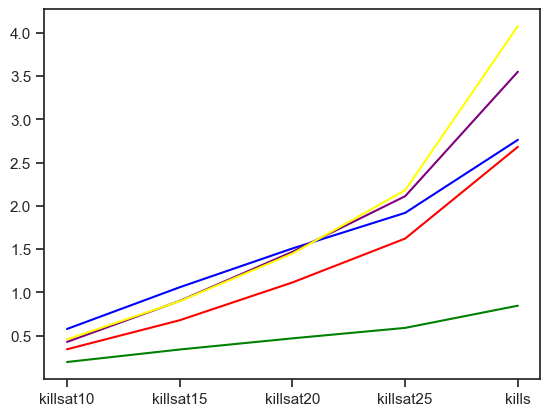

In [47]:
# We can see that Junglers start of with the most kills and then get overtaken by Mid and Bot just after 20 minutes into the game.  Support has the least kills by far at all points of the game.
colours = ["red", "blue", "purple", "yellow", "green"]
positions = ["top", "jng", "mid", "bot", "sup"]
for i in range(5):
    plt.plot(dflol.loc[dflol["position"] == positions[i], ["killsat10", "killsat15", "killsat20", "killsat25", "kills"]].mean(), color=colours[i])
plt.show()

In [48]:
# We can see, from looking at teamkills, that the winning team gets around 2x the kills of the losing team.
dflol.groupby("result")["teamkills"].mean()

result
0     9.068797
1    18.778233
Name: teamkills, dtype: float64

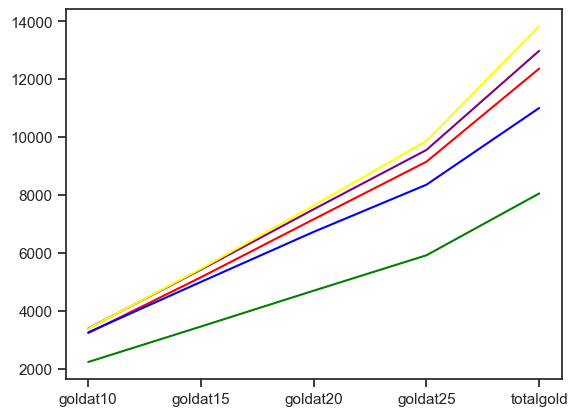

In [49]:
# In terms of gold, it is pretty evenly spread among 4 of the positions at the start of the game with differences developing from 15 minutes into the game and continuing, just like kills, with Bot having the most, then Mid, Top and Jungle.  Support has the least gold throughout the game by far.
colours = ["red", "blue", "purple", "yellow", "green"]
positions = ["top", "jng", "mid", "bot", "sup"]
for i in range(5):
    plt.plot(dflol.loc[dflol["position"] == positions[i], ["goldat10", "goldat15", "goldat20", "goldat25", "totalgold"]].mean(), color=colours[i])
plt.show()

In [50]:
# For team gold, we can look at the statistic gpr, which is the percent of total gold (both teams) that the individual team has standardised around 50% so that any value above 0 means that the team had a majority of the gold in the game.  We can see that when a team had the majority of gold in a game, they won 84% of the time.
team_gold_majority = dflol[dflol["gpr"] > 0.].groupby("result").size()
team_gold_majority.iloc[1]/team_gold_majority.sum()

0.8447595779819018

In [51]:
# We can also look at "towers" which seem to be more indicative of a team winning.  In order for a team to win they have to destroy at least 5 towers of the enemy team (of the 11 enemy towers total).
all_towers = dflol[dflol["towers"] == 11.0].groupby("result").size()
all_towers.iloc[1]/all_towers.sum()
# Only 0.7% of games where a team destroyed 11 towers did they lose.

0.9933836936702266

In [52]:
# Regarding many of the statistics, we can do some linear regression on the final statistics to get an idea of what most correlates to winning or losing a game.

In [53]:
team_df = dflol[dflol["position"] == "team"]

In [54]:
team_df

,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
gameid,,,,,,,,,,,,,,,,,,,,,
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,100,...,760.0,4854.0,4919.0,-21.0,10.0,23.0,4.0,4.0,6.0,10.0
TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,200,...,739.0,-4854.0,-4919.0,21.0,4.0,6.0,10.0,10.0,23.0,4.0
TRLH3/44,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 19:16:29,1.0,3.15,100,...,707.0,3363.0,889.0,-30.0,7.0,16.0,6.0,6.0,11.0,7.0
TRLH3/44,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 19:16:29,1.0,3.15,200,...,677.0,-3363.0,-889.0,30.0,6.0,11.0,7.0,7.0,16.0,6.0
TRLH3/76,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 21:28:45,1.0,3.15,100,...,781.0,2040.0,2535.0,46.0,3.0,4.0,4.0,4.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOLTMNT02_193448,complete,NaN,KeSPA,2025,NaN,0,2024-12-08 07:11:51,2.0,14.23,200,...,922.0,-10235.0,-10824.0,-50.0,6.0,17.0,19.0,19.0,49.0,6.0
LOLTMNT02_194400,complete,NaN,KeSPA,2025,NaN,0,2024-12-08 07:59:31,3.0,14.23,100,...,860.0,3969.0,4911.0,13.0,11.0,37.0,11.0,11.0,26.0,11.0
LOLTMNT02_194400,complete,NaN,KeSPA,2025,NaN,0,2024-12-08 07:59:31,3.0,14.23,200,...,873.0,-3969.0,-4911.0,-13.0,11.0,26.0,11.0,11.0,37.0,11.0


In [55]:
team_df.groupby("result")["xpdiffat10"].mean()

result
0   -438.808577
1    438.808577
Name: xpdiffat10, dtype: float64

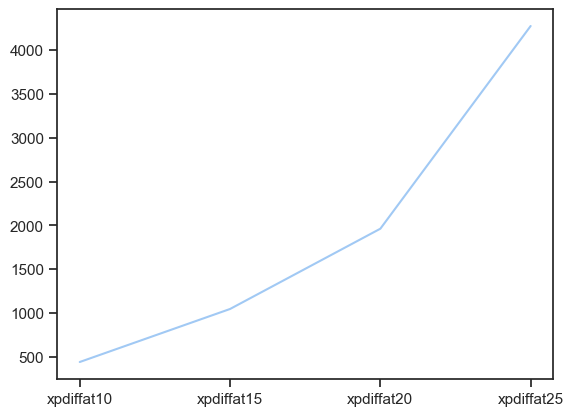

In [56]:
plt.plot(team_df.loc[team_df["result"] == 1, ["xpdiffat10", "xpdiffat15", "xpdiffat20", "xpdiffat25"]].mean())
plt.show()

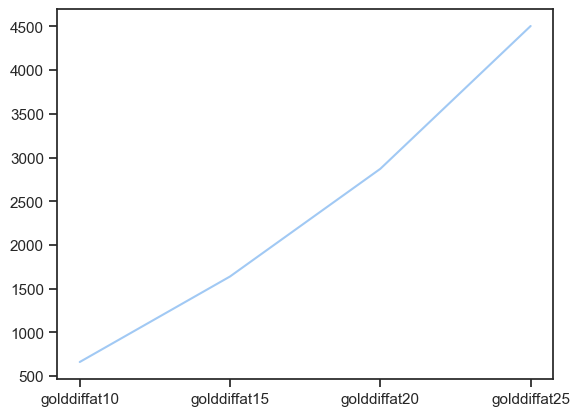

In [57]:
plt.plot(team_df.loc[team_df["result"] == 1, ["golddiffat10", "golddiffat15", "golddiffat20", "golddiffat25"]].mean())
plt.show()

In [58]:
team_df.isna().sum()/len(team_df) * 100

datacompleteness     0.000000
url                 34.350326
league               0.000000
year                 0.000000
split               21.908941
                      ...    
assistsat25         17.779090
deathsat25          17.779090
opp_killsat25       17.779090
opp_assistsat25     17.779090
opp_deathsat25      17.779090
Length: 160, dtype: float64

In [59]:
"""# We can edit team_df to add derived columns like the difference in towers and kills per minute (kpm) between the 2 teams.
dflol["tower_diff"] = dflol["towers"] - dflol["opp_towers"]
dflol["opp_kpm"] = dflol["ckpm"] - dflol["team kpm"]
dflol["kpm_diff"] = dflol["team kpm"] - dflol["opp_kpm"]
# We can also look at the gold that is not spent at the end of a game.  (Teams that win games often gain gold at the end of the game and don't have money to spend it which may be a reason that "goldspend" has a negative w_value)
dflol["unspent_gold"] = dflol["totalgold"] - dflol["goldspent"]
# "unspet_gold_normalised" is not the most accurate statistic because it is the difference between 2 percentages rather than being the proportion of all the unspent gold that the team has
dflol["unspent_gold_normalised"] = dflol["gpr"] - dflol["gspd"]

team_df = dflol[dflol["position"] == "team"]"""

'# We can edit team_df to add derived columns like the difference in towers and kills per minute (kpm) between the 2 teams.\ndflol["tower_diff"] = dflol["towers"] - dflol["opp_towers"]\ndflol["opp_kpm"] = dflol["ckpm"] - dflol["team kpm"]\ndflol["kpm_diff"] = dflol["team kpm"] - dflol["opp_kpm"]\n# We can also look at the gold that is not spent at the end of a game.  (Teams that win games often gain gold at the end of the game and don\'t have money to spend it which may be a reason that "goldspend" has a negative w_value)\ndflol["unspent_gold"] = dflol["totalgold"] - dflol["goldspent"]\n# "unspet_gold_normalised" is not the most accurate statistic because it is the difference between 2 percentages rather than being the proportion of all the unspent gold that the team has\ndflol["unspent_gold_normalised"] = dflol["gpr"] - dflol["gspd"]\n\nteam_df = dflol[dflol["position"] == "team"]'

In [60]:
# I'm going to do some basic linear regression to have a look at the parts of the game that correlate more to a team winning.  For this purpose I will use statistics that are only possible at the end of games.
# I am dropping columns that give data only at a certain point in the game, columns were a large amount of the values are NaN, or when the data is non-numerical
#
team_df_for_log_reg = (team_df.drop(["datacompleteness", "url", "league", "year", "split", "playoffs", "date", "game", "patch", "participantid", "position", "playername", "playerid", "teamname", "teamid", "champion", "ban1", "ban2", "ban3", "ban4", "ban5", "pick1", "pick2", "pick3", "pick4", "pick5", "gamelength", "teamkills", "teamdeaths", "firstbloodkill", "firstbloodassist", "firstbloodvictim", "firstdragon", "elementaldrakes", "opp_elementaldrakes", "infernals", "mountains", "clouds", "oceans", "chemtechs", "hextechs", "dragons (type unknown)", "firstherald", "void_grubs", "opp_void_grubs", "firstbaron", "turretplates", "opp_turretplates", "damageshare", "earnedgoldshare", "total cs", "monsterkillsownjungle", "monsterkillsenemyjungle", "opp_dragons", "opp_elders", "opp_heralds", "opp_barons", "opp_towers", "opp_inhibitors"], axis=1)
           .drop(columns=team_df.filter(regex=r"at\d{2}$").columns))

In [61]:
team_df_for_log_reg = team_df_for_log_reg.dropna()

In [62]:
team_df_for_log_reg.head()

,side,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,...,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm
gameid,,,,,,,,,,,,,,,,,,,,,
ESPORTSTMNT02/180233,Blue,1,21,13,60,4.0,1.0,0.0,0.0,0.0,...,7.6414,74736.0,49113.0,1234.5119,67018.0,0.026351,-0.66,1002.0,190.0,29.9623
ESPORTSTMNT02/180233,Red,0,13,21,23,0.0,0.0,0.0,0.0,1.0,...,9.0239,67384.0,41761.0,1049.7109,65275.0,-0.026351,0.66,1031.0,133.0,29.2585
ESPORTSTMNT02/180242,Blue,0,9,24,11,1.0,0.0,0.0,0.0,0.0,...,6.4018,46146.0,26898.0,915.9364,44208.0,-0.258036,-4.23,742.0,116.0,29.2168
ESPORTSTMNT02/180242,Red,1,24,9,53,2.0,0.0,0.0,0.0,1.0,...,8.6493,61149.0,41901.0,1426.8218,57305.0,0.258036,4.23,733.0,131.0,29.4211
ESPORTSTMNT02/190231,Blue,0,24,14,53,2.0,2.0,0.0,0.0,1.0,...,7.1029,77999.0,49754.0,1129.0620,72950.0,-0.093907,-1.51,1167.0,131.0,29.4554


In [63]:
# I will combine each game into 1 row from 2 rows.
blue_team_df = team_df_for_log_reg[team_df_for_log_reg["side"] == "Blue"].drop("side", axis=1).add_prefix("blue_").rename({"blue_result":"result", "blue_ckpm":"ckpm"}, axis=1)
red_team_df = team_df_for_log_reg[team_df_for_log_reg["side"] == "Red"].drop(["result", "side", "ckpm"], axis=1).add_prefix("red_")

In [64]:
red_team_df.head()

,red_kills,red_deaths,red_assists,red_doublekills,red_triplekills,red_quadrakills,red_pentakills,red_firstblood,red_team kpm,red_dragons,...,red_vspm,red_totalgold,red_earnedgold,red_earned gpm,red_goldspent,red_gspd,red_gpr,red_minionkills,red_monsterkills,red_cspm
gameid,,,,,,,,,,,,,,,,,,,,,
ESPORTSTMNT02/180233,13,21,23,0.0,0.0,0.0,0.0,1.0,0.3268,2.0,...,9.0239,67384.0,41761.0,1049.7109,65275.0,-0.026351,0.66,1031.0,133.0,29.2585
ESPORTSTMNT02/180242,24,9,53,2.0,0.0,0.0,0.0,1.0,0.8173,3.0,...,8.6493,61149.0,41901.0,1426.8218,57305.0,0.258036,4.23,733.0,131.0,29.4211
ESPORTSTMNT02/190231,14,24,31,0.0,0.0,0.0,0.0,0.0,0.3177,3.0,...,8.0333,85992.0,57747.0,1310.4463,80138.0,0.093907,1.51,1149.0,205.0,30.7262
ESPORTSTMNT02/190241,16,2,30,3.0,1.0,0.0,0.0,1.0,0.6612,2.0,...,7.3554,52941.0,36855.0,1522.9339,47958.0,0.461973,7.14,663.0,125.0,32.5620
ESPORTSTMNT02/190253,7,11,5,1.0,0.0,0.0,0.0,0.0,0.1645,3.0,...,8.6486,81444.0,54127.0,1272.0799,74433.0,0.046507,-0.05,1291.0,222.0,35.5582


In [65]:
team_df_for_log_reg = pd.concat([blue_team_df, red_team_df], axis=1)

In [66]:
team_df_for_log_reg.head()

,result,blue_kills,blue_deaths,blue_assists,blue_doublekills,blue_triplekills,blue_quadrakills,blue_pentakills,blue_firstblood,blue_team kpm,...,red_vspm,red_totalgold,red_earnedgold,red_earned gpm,red_goldspent,red_gspd,red_gpr,red_minionkills,red_monsterkills,red_cspm
gameid,,,,,,,,,,,,,,,,,,,,,
ESPORTSTMNT02/180233,1,21,13,60,4.0,1.0,0.0,0.0,0.0,0.5279,...,9.0239,67384.0,41761.0,1049.7109,65275.0,-0.026351,0.66,1031.0,133.0,29.2585
ESPORTSTMNT02/180242,0,9,24,11,1.0,0.0,0.0,0.0,0.0,0.3065,...,8.6493,61149.0,41901.0,1426.8218,57305.0,0.258036,4.23,733.0,131.0,29.4211
ESPORTSTMNT02/190231,0,24,14,53,2.0,2.0,0.0,0.0,1.0,0.5446,...,8.0333,85992.0,57747.0,1310.4463,80138.0,0.093907,1.51,1149.0,205.0,30.7262
ESPORTSTMNT02/190241,0,2,16,5,0.0,0.0,0.0,0.0,0.0,0.0826,...,7.3554,52941.0,36855.0,1522.9339,47958.0,0.461973,7.14,663.0,125.0,32.5620
ESPORTSTMNT02/190253,0,11,7,22,1.0,0.0,0.0,0.0,1.0,0.2585,...,8.6486,81444.0,54127.0,1272.0799,74433.0,0.046507,-0.05,1291.0,222.0,35.5582


In [67]:
team_df_for_log_reg["tower_diff"] = team_df_for_log_reg["blue_towers"] - team_df_for_log_reg["red_towers"]
team_df_for_log_reg["kpm_diff"] = team_df_for_log_reg["blue_team kpm"] - team_df_for_log_reg["red_team kpm"]
# We can also look at the gold that is not spent at the end of a game.  (Teams that win games often gain gold at the end of the game and don't have money to spend it which may be a reason that "goldspend" has a negative w_value)
team_df_for_log_reg["blue_unspent_gold"] = team_df_for_log_reg["blue_totalgold"] - team_df_for_log_reg["blue_goldspent"]
team_df_for_log_reg["red_unspent_gold"] = team_df_for_log_reg["red_totalgold"] - team_df_for_log_reg["red_goldspent"]
# "unspet_gold_normalised" is not the most accurate statistic because it is the difference between 2 percentages rather than being the proportion of all the unspent gold that the team has
team_df_for_log_reg["unspent_gold_diff"] = team_df_for_log_reg["blue_unspent_gold"] - team_df_for_log_reg["red_unspent_gold"]

In [68]:
# Function for logistic regression
# Separating the "result" column as the array_result (Y columns)
# Creating the Test and Train dataframes
# Scaling the data for more efficient gradient descent
# Work the model
# Export the result
def logistic_regression(array, split):

    # Split data into X and y as well as train and test.
    array_result = array["result"]
    array = array.drop(labels="result", axis=1)
    array_train, array_test, array_result_train, array_result_test = train_test_split(array, array_result, test_size = split, random_state=2)
    # Scale data
    scaler = StandardScaler()
    array_train = scaler.fit_transform(array_train)
    array_test = scaler.transform(array_test)

    model = LogisticRegression(max_iter=100000)
    model.fit(array_train, array_result_train)
    array_result_pred = model.predict(array_test)
    #indices = array_result_test.index[array_result_test != array_result_pred]
    test_indices = array_result_test.index


    w_values = model.coef_
    rank = pd.DataFrame(w_values, columns=array.columns).T.rename(columns={0:"scaler"})
    rank = rank.sort_values(by="scaler", ascending=False)

    return accuracy_score(array_result_test, array_result_pred), rank, test_indices, array_result_pred

''

In [69]:
# Output the accuracy, the w_values for each item, the indices for the rows that were used in the test sample and the result predictions
accuracy, rank, test_indices, predictions = logistic_regression(team_df_for_log_reg, 0.2)

In [70]:
accuracy
# Predict with about 99.6% accuracy

0.9959687578735198

In [71]:
accuracy, rank, test_indices, predictions = logistic_regression(team_df_for_log_reg, 0.5)

In [72]:
# Similar accuracy but larger test sample size
accuracy

0.9962711636656812

In [73]:
rank
# We can see the main indicators being kills, towers and gold with a lower emphasis on damage and objectives such as dragons and heralds.  Stats like minionkills (smaller computer controlled enemies that give gold) are barely utilised by the logistic regression.

,scaler
tower_diff,2.791125
blue_towers,2.541612
blue_earned gpm,2.006078
red_gpr,1.564949
blue_earnedgold,1.352440
...,...
red_minionkills,-1.250603
red_earnedgold,-1.328701
blue_gpr,-1.564949
red_earned gpm,-1.987305


In [74]:
info_team_df = team_df.loc[team_df["side"] == "Blue",["datacompleteness", "url", "league", "year", "split", "playoffs", "date", "game", "patch","teamname", "teamid", "champion", "ban1", "ban2", "ban3", "ban4", "ban5", "pick1", "pick2", "pick3", "pick4", "pick5", "gamelength"]]

In [75]:
tested_df = pd.concat([team_df_for_log_reg.loc[test_indices], info_team_df.loc[test_indices]], axis=1)

In [76]:
tested_df["prediction"] = predictions
tested_df["accurate"] = tested_df["result"] == tested_df["prediction"]

In [77]:
false_pred_df = tested_df[tested_df["accurate"] == False]
true_pred_df = tested_df[tested_df["accurate"] == True]

In [78]:
tested_df.head()

,result,blue_kills,blue_deaths,blue_assists,blue_doublekills,blue_triplekills,blue_quadrakills,blue_pentakills,blue_firstblood,blue_team kpm,...,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,prediction,accurate
gameid,,,,,,,,,,,,,,,,,,,,,
ESPORTSTMNT01/1721617,0,5,15,12,0.0,0.0,0.0,0.0,1.0,0.1190,...,Twisted Fate,Graves,Kai'Sa,Gragas,Nidalee,Orianna,Aatrox,2520,0,True
ESPORTSTMNT01/1894458,0,13,22,31,3.0,0.0,0.0,0.0,0.0,0.3705,...,Nautilus,Kalista,Thresh,Hecarim,Aphelios,Gragas,Orianna,2105,0,True
ESPORTSTMNT01/1306413,1,12,5,36,0.0,0.0,0.0,0.0,1.0,0.3047,...,LeBlanc,Yuumi,Sett,Jarvan IV,Syndra,Ezreal,Thresh,2363,1,True
ESPORTSTMNT02/1020442,0,14,13,19,0.0,0.0,0.0,0.0,1.0,0.4361,...,LeBlanc,Karthus,Irelia,Galio,Draven,Swain,Elise,1926,0,True
ESPORTSTMNT04_2240172,0,11,27,18,1.0,0.0,0.0,0.0,0.0,0.3226,...,Irelia,Lucian,Volibear,Xayah,Gnar,Ahri,Karma,2046,0,True


In [79]:
# Similar amounts of false positives (52) and false negatives (59)
false_pred_df["result"].value_counts()
# Do binary distribution and p value test

result
0    59
1    52
Name: count, dtype: int64

In [80]:
comparison_cols = ["result", "gamelength", "blue_elders", "red_elders"]
false_pred_df[comparison_cols].mean()

result            0.468468
gamelength     2576.036036
blue_elders       0.315315
red_elders        0.423423
dtype: float64

In [81]:
true_pred_df[comparison_cols].mean()

result            0.528610
gamelength     1923.324308
blue_elders       0.061402
red_elders        0.067471
dtype: float64

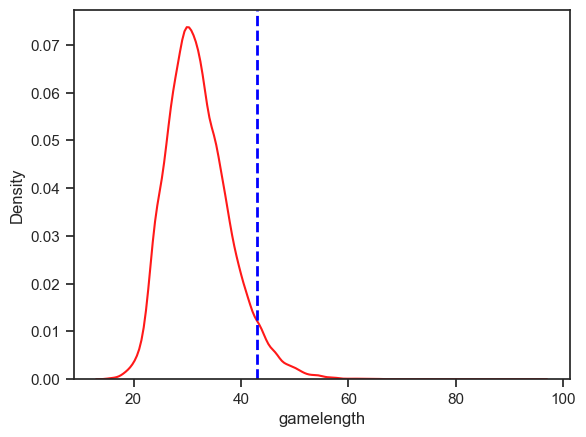

42.933933933933936
94.90392367643106


In [82]:
# We can see that when the games which are predicted wrong tend to be longer (over 41 minutes long on average) compared to 32 minutes for the average game.  This is the 90th percentile of gamelengths.

sns.kdeplot(tested_df["gamelength"]/60, color="red", linewidth=1.5, alpha=0.9)
plt.axvline(false_pred_df["gamelength"].mean()/60, color='blue', linestyle='--', linewidth=2)
plt.show()
print(false_pred_df["gamelength"].mean()/60)
print(percentileofscore(tested_df["gamelength"], false_pred_df["gamelength"].mean()))

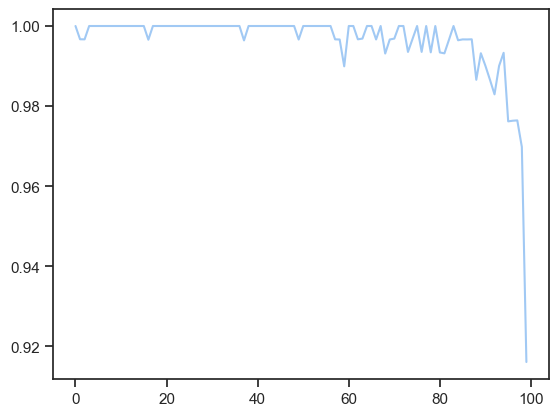

In [83]:
# We can look at the chances of a successful prediction depending on the length of the game
no_of_cuts = 100
tested_df["gamelength_percentile"] = pd.qcut(tested_df["gamelength"], no_of_cuts, labels=list(range(no_of_cuts)))
plt.plot(tested_df.groupby("gamelength_percentile")["accurate"].mean())
plt.show()
# We can see that in games in the first 50 percentiles, the chances of a correct prediction are significantly higher and then the model slowly gets worse as the games get longer until it drops significantly down to less than 92% for the 99th percentile

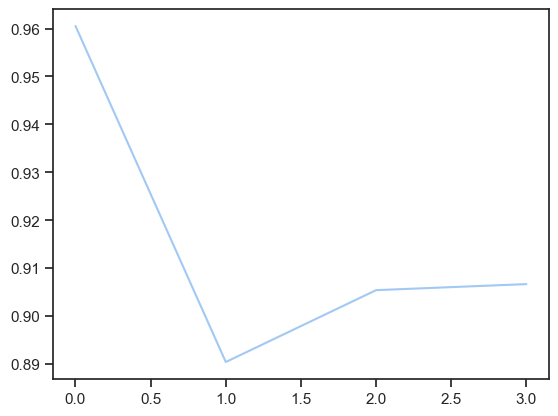

In [84]:
# We can look closer at that 99th percentile and see that whilst the model is worse at predicting longer games, the curve plateaus at a 90% prediction rate.
# We can look closer at these games
tested_df["99_gamelength_percentile"] = pd.qcut(tested_df.loc[tested_df["gamelength_percentile"] == 99, "gamelength"], 4, labels=list(range(4)))
plt.plot(tested_df.groupby("99_gamelength_percentile")["accurate"].mean())
plt.show()

In [91]:
longest_games_champ_df = dflol.loc[dflol["gamelength"] > 3000, "champion"].value_counts()
#longest_games_champ_df = longest_games_champ_df.loc[longest_games_champ_df[longest_games_champ_df > 30].index]

In [92]:
longest_games_champ_percent_df = (longest_games_champ_df/dflol["champion"].value_counts()).sort_values(ascending=False)
longest_games_champ_percent_df

champion
Rammus       0.065574
Evelynn      0.055060
Malzahar     0.052632
Zyra         0.043067
Teemo        0.042553
               ...   
Briar             NaN
Garen             NaN
Master Yi         NaN
Naafiri           NaN
Shaco             NaN
Name: count, Length: 169, dtype: float64

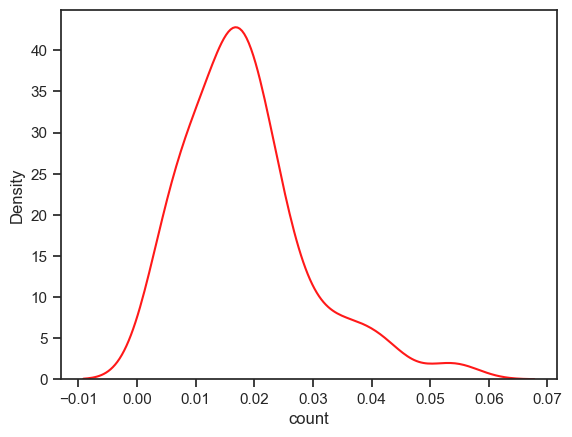

In [87]:
sns.kdeplot(longest_games_champ_percent_df, color="red", linewidth=1.5, alpha=0.9)
plt.show()

In [99]:
# We can compare the champions that are disproportionately in long games with champions that are disproportionately in games that the logistic regression predicted falsely
false_pred_champs_df = dflol.loc[false_pred_df.index, "champion"].value_counts()
false_pred_champs_percent_df = (false_pred_champs_df/dflol["champion"].value_counts()).sort_values(ascending=False)
false_pred_champs_percent_df.corr(longest_games_champ_percent_df)
# Unfortunately an R squared value of 0.11 means that there is a very weak correlation and so I don't think it is prescient to push this idea further

0.1125270688493983

In [133]:
# Before moving on to creating a predictive model, I will be looking at the differences in data between different champions.  Whilst, gold and kills are clearly correlated to winning games, different champions may need different amounts of gold to be effective
champ_pos_df = dflol[dflol["position"] != "team"].groupby(["champion", "position"]).size()
dflol[dflol["position"] != "team"].groupby(["champion", "position"])[["golddiffat25", "xpdiffat25", "killsat25", "deathsat25", "csdiffat25", "gamelength", "result"]].mean().loc[champ_pos_df[champ_pos_df > 100].index]
#[["golddiffat25", "xpdiffat25", "killsat25", "deathsat25"]].mean()

golddiffat25  xpdiffat25  killsat25  deathsat25  \
champion position                                                    
Aatrox   jng         121.932432  290.990991   1.711712    1.405405   
         mid         140.830000  343.174000   2.146000    1.512000   
         top         146.957904  286.652157   1.804249    1.788479   
Ahri     mid           9.891190   14.233916   2.315906    1.371584   
Akali    mid          36.679374   74.932551   3.076979    1.611926   
...                         ...         ...        ...         ...   
Zilean   mid        -613.975309  599.773148   1.189815    0.953704   
         sup        -187.361624  468.180812   0.538745    1.483395   
Zoe      mid         -87.373300 -230.250309   1.985991    1.191389   
Zyra     jng         283.516611  631.166113   1.988372    1.872093   
         sup         285.874542  -44.726190   0.721612    1.693223   

                   csdiffat25   gamelength    result  
champion position                                     
Aatrox   jng         9.486486  1988.870833  0.470833  
         mid         0.250000  1893.964883  0.540134  
         top         6.323863  1914.741484  0.501599  
Ahri     mid        -1.380920  1931.757544  0.511365  
Akali    mid        -4.796188  1899.714855  0.498504  
...                       ...          ...       ...  
Zilean   mid       -13.924383  2074.171468  0.526749  
         sup        -9.758303  1973.611111  0.462963  
Zoe      mid        -5.549032  1957.879259  0.517561  
Zyra     jng        19.554817  1903.763265  0.542857  
         sup        -7.237179  2183.160116  0.481077  

[303 rows x 7 columns]

In [126]:
dflol[dflol["position"] != "team"].groupby(["champion", "position"])[["golddiffat25", "xpdiffat25", "killsat25", "deathsat25", "csdiffat25", "gamelength", "result"]].std().loc[champ_pos_df[champ_pos_df > 100].index]
# We can see the significant differences between the mean and standard deviation for different champions and in their different positions and how some champions do particularly well in certain stats
# Katarina mid averages the most kills a game with 3.4 but loses 42% of the games she plays
# Senna averages the 2nd lowest golddiffat25 and still wins 51% of her games
# There are also notable, but smaller changes in the standard deviation of champions.  If we look at Aatrox, his golddiffat25's std is higher for the positions of mid and top than it is for jungle.

golddiffat25   xpdiffat25  killsat25  deathsat25  \
champion position                                                     
Aatrox   jng        1655.229338  1681.617719   1.935089    1.303517   
         mid        1961.187652  1962.773036   1.850279    1.379007   
         top        2002.555200  1848.104526   1.769498    1.482594   
Ahri     mid        1816.991784  1730.335166   1.998773    1.268905   
Akali    mid        1866.978164  1785.054273   2.278611    1.420744   
...                         ...          ...        ...         ...   
Zilean   mid        1617.145168  1599.559018   1.378603    1.068454   
         sup        1345.035828  1409.942892   0.950422    1.428098   
Zoe      mid        1696.117063  1591.749403   1.886489    1.244911   
Zyra     jng        1729.381350  2180.760782   1.709774    1.458894   
         sup        1103.318976  1108.678077   0.963766    1.452022   

                   csdiffat25  gamelength    result  
champion position                                    
Aatrox   jng        27.338788  391.359090  0.500192  
         mid        35.077177  350.580983  0.498804  
         top        35.302322  354.733560  0.500025  
Ahri     mid        28.932570  371.297287  0.499904  
Akali    mid        30.608759  341.918301  0.500048  
...                       ...         ...       ...  
Zilean   mid        30.804697  430.044576  0.499627  
         sup        43.188007  370.659471  0.499047  
Zoe      mid        30.414324  370.807612  0.499735  
Zyra     jng        37.001162  338.857836  0.498499  
         sup        15.199787  482.527304  0.499824  

[303 rows x 7 columns]

In [134]:
dflol[(dflol["position"] != "team") & (dflol["result"] == 1)].groupby(["champion", "position"])[["golddiffat25", "xpdiffat25", "killsat25", "deathsat25", "csdiffat25", "gamelength"]].mean().loc[champ_pos_df[champ_pos_df > 100].index] - dflol[(dflol["position"] != "team") & (dflol["result"] == 0)].groupby(["champion", "position"])[["golddiffat25", "xpdiffat25", "killsat25", "deathsat25", "csdiffat25", "gamelength"]].mean().loc[champ_pos_df[champ_pos_df > 100].index]
# This shows the difference between games when a champion is winning and losing
# We can see that some champions like Nidalee, Karthus and Fiddlesticks are heavily reliant getting cs in order to win, that kills, gold and xp don't matter much to many supports

golddiffat25   xpdiffat25  killsat25  deathsat25  \
champion position                                                     
Aatrox   jng        1913.105006  2057.072527   0.926496   -0.949939   
         mid        2319.906367  2369.641559   1.093199   -0.978155   
         top        1912.966569  1931.805040   0.979469   -0.895305   
Ahri     mid        1946.184010  1844.880971   1.147638   -0.751182   
Akali    mid        2086.896203  1972.503382   1.356746   -0.898170   
...                         ...          ...        ...         ...   
Zilean   mid        1836.508280  1555.407207   0.746203   -0.528700   
         sup        1226.913029  1221.178493   0.189738   -0.809210   
Zoe      mid        1779.218291  1565.152623   1.098058   -0.712549   
Zyra     jng        1843.324487  2497.908242   0.754646   -0.985552   
         sup        1210.899229   975.437083   0.240021   -0.835805   

                   csdiffat25  gamelength  
champion position                          
Aatrox   jng        25.821734   14.592920  
         mid        25.150295    2.143192  
         top        18.117077  -15.778246  
Ahri     mid        13.081092  -23.873172  
Akali    mid        17.361325   43.241752  
...                       ...         ...  
Zilean   mid        17.475332  -52.329982  
         sup         3.128004   13.034107  
Zoe      mid        12.254770  -33.675903  
Zyra     jng        28.416155  -46.055608  
         sup         2.472426   -8.048900  

[303 rows x 6 columns]

In [224]:
# Now that I have done some exploratory data analysis, I will move on to creating a model to predict games.  From this notebook, I have learnt the main statistics that correlate to winning games, being turrets, gold and kills.
# I have also learnt when this data becomes less useful, when games are longer than 50 minutes.
# I have also learnt about the differences between the different positions and the differences between different champions and how their winrate is affected differently by different statistics.

In [ ]:
# To do List:
